<a href="https://colab.research.google.com/github/ebercab7/fcomputacional/blob/main/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Bibliotecas a utilizar: 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #graficos 3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

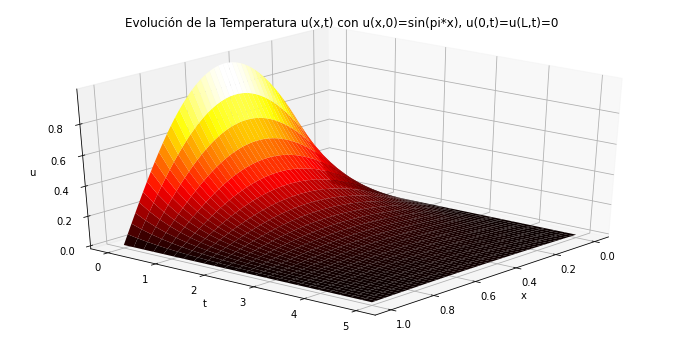

In [ ]:
# Dado que para una x fija, la T varia con respecto a t
# Y conocemos los valores iniciales de T para todas nuestras x
# en t=0, para conocer la evolución del sistema hará falta resolver
# dT/dt para cada una de las x. Dicha dT/dt está en terminos
# del valor de (d^2/dx^2)T en el punto sin embargo esta ultima puede ser expresada
# en terminos de los valores de T iniciales en el punto y su vecindad
# con series de Taylor

# Contextualizado el problema, pasemos a definir dT/dt para 
# cada x en base a las condiciones iniciales de T

def calor(f, t, kappa, h, n, T1, T2):
  # se crea el arreglo de cada ec. diferencial dT/dt para cada x, solo en forma
  dfdt = np.zeros_like(f)

  # condiciones de frontera, T(x=0) y T(L) (L longitud de la barra)
  dfdt[0]=T1
  dfdt[-1]=T2
  # La temperatura en los extremos se mantiene fija (hielo del oxxo), el calor se disipa hacia
  # dichos extremos pero estos retoman su temperatura de cero de manera
  # casi instantanea

  # se crea el loop que asigna a cada x su respectiva ec. diferencial
  # (en terminos de la cte y el laplaciano expresado como 
  # valores de la función en dicho punto y la vecindad, condiciones iniciales)
  # cuando "odeint" opere, los valores mencionados serán los calculados un paso atras.

  for i in range(1,n-1):
    # no toca los extremos, ya estan definidos
    dfdt[i] = (kappa/(h**2))*(f[i+1]+f[i-1]-2.0*f[i])
  return dfdt  
  

# Definimos parametros del problema:
# Temperaturas de los extremos
T1 = 0 # T(x=0)
T2 = 0 # T(x=L)
# kappa
kappa = 0.1
# intervalo de x
a = 0.
b = 1.
# intervalo de tiempo
t0 = 0.
tf = 5.0
# Numero de puntos sobre el intervalo x
n = 50
# tamaño del paso
h = (b-a)/(n-1)
# puntos sobre el intervalo
x = np.linspace(a,b,n)
# condición inicial de T para cada x
f0 = np.sin(np.pi*x)
# Valores de T menores a cero excluidos.
f0[f0 < 0] = 0
# Con los pasos para x se obtienen las y cuantas dT/dt, con los pasos de tiempo
# se calculan las soluciones de dT/dt para cada x, un total de tspan soluciones
# para cada dT/dt correspondiente a cada paso de x 
# puntos de integración para "odeint"
tspan = np.linspace(t0, tf, 25)


# Solución usando "odeint"
sol = odeint(calor, f0, tspan, args=(kappa,h,n, T1, T2))


#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=40)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()



# **Ejercicio 1.a**

r=0.004802960592118423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'lw'


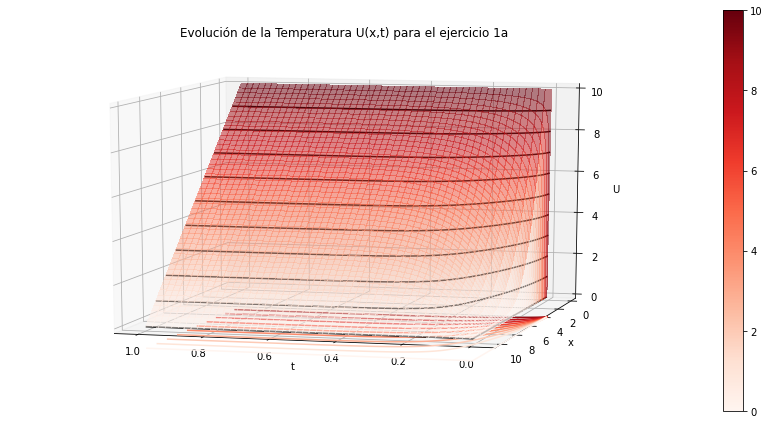

In [33]:
# Se construye ahora un codigo para el metodo de diferencias finitas
# mismo con el que se dará paso a solucionar los ejercicios


# Parametros de la situación

N = 5000 # pasos en el tiempo
M = 50 # pasos en el espacio

# Longitud de la barra
x0 = 0
xf = 10
# Periodo de simulació:
t0 = 0
tf = 1
# Tamaño de paso:
dx = (xf-x0)/(M-1)
dt = (tf-t0)/(N-1)
# Constante de difusión
kappa = 100
# Puntos en el tiempo y el espacio
tspan = np.linspace(t0,tf,N)
xspan = np.linspace(x0,xf,M)

# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 0
U[0, :] = 10
U[-1, :] = 0

#parametro de la ecuación
alpha = kappa*dt/dx**2
print(f"r={dt/dx**2}" )
# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 1a')

# Punto del observador 
ax.view_init(elev=10, azim=105)

plt.tight_layout()
plt.show()

# **Ejercicio 1.b**

r=0.23054210842168432


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'


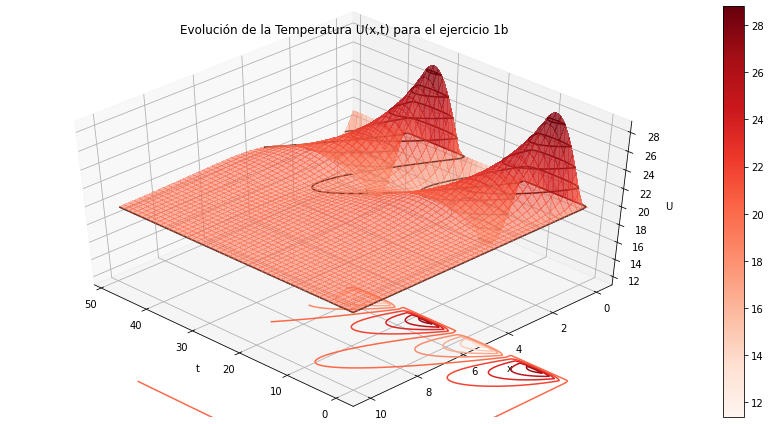

In [36]:
# Parametros de la situación

N = 5000 # pasos en el tiempo
M = 50 # pasos en el espacio

# Longitud de la barra
x0 = 0
xf = 10
# Periodo de simulació:
t0 = 0
tf = 48
# Tamaño de paso:
dx = (xf-x0)/(M-1)
dt = (tf-t0)/(N-1)
# Constante de difusión
kappa = 0.25
# Puntos en el tiempo y el espacio
tspan = np.linspace(t0,tf,N)
xspan = np.linspace(x0,xf,M)

# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 20
#U[0, :] = 10
U[-1, :] = 20

#parametro de la ecuación
alpha = kappa*dt/dx**2
print(f"r={dt/dx**2}" )
# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    U[0, :] = 20+10*np.sin(np.pi*k*dt/12)
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 1b')

# Punto del observador 
ax.view_init(elev=45, azim=135)

plt.tight_layout()
plt.show()

# **Ejercicio 2**


r=17.823594959856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'


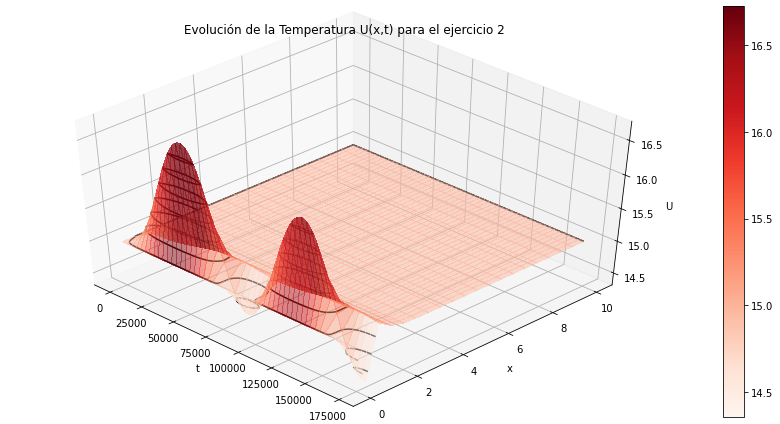

In [46]:
# Parametros de la situación

N = 35000 # pasos en el tiempo
M = 20 # pasos en el espacio

# Profundidad
x0 = 0
xf = 10
# Periodo de simulació:
t0 = 0
tf = 172800
# Tamaño de paso:
dx = (xf-x0)/(M-1)
dt = (tf-t0)/(N-1)
# Constante de difusión
kappa = 1*10**(-6)
# Puntos en el tiempo y el espacio
tspan = np.linspace(t0,tf,N)
xspan = np.linspace(x0,xf,M)

# Malla 
U = np.zeros((M,N))

#Condiciones iniciales
U[:, 0] = 15
#U[0, :] = 10
U[-1, :] = 15

#parametro de la ecuación
alpha = kappa*dt/dx**2
print(f"r={dt/dx**2}" )

# Parametros de las condiciones iniciales:
u_0 = 15
u_a = 20
P = 86400

# Método de diferencias finitas Ec. del Calor
for k in range(0, N-1): # Avance en el tiempo
    U[0, :] = u_0+u_a*np.sin(2*np.pi*k*dt/P)
    for i in range(1, M-1): # Calcula la Temp sobre todo el dominio en x
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Define malla para graficar
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Grafica una superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas de los ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) para el ejercicio 2')

# Punto del observador 
ax.view_init(elev=45, azim=-45)

plt.tight_layout()
plt.show()